In [97]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import warnings 
from pathlib import Path  
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, auc,roc_curve
import pickle as pkl
warnings.filterwarnings('ignore')

In [2]:
con = sqlite3.connect(r"/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/raw/password_data.sqlite")

In [3]:
data = pd.read_sql_query("SELECT * from Users", con)

In [4]:
data.sample(9)

,index,password,strength
79588,79588,gourav007,1
5246,5246,h4g1x5ya,1
85362,85362,vikas###,1
45399,45399,fireball77,1
42802,42802,upezlqay897,1
50809,50809,sayaf 866150,1
37498,37498,y43787295,1
27803,27803,game_master,1
12745,12745,vuthy233,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
filepath = Path('/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/processed/Ndata.csv')
data.to_csv(filepath , index= False)

In [7]:
df = pd.read_csv('/Users/0xnrous/Developer/End2End_DataScience/Predicting_Password Robustness _via_NLP/e2e_ML_predicting_password_strength_enhancing_cybersecurity/data/processed/Ndata.csv')

In [8]:
df.head(7)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1
5,5,16623670p,1
6,6,yj9q3f8p,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [10]:
#df.drop(['index'], axis=1, inplace=True)

In [11]:
df.sample()

,index,password,strength
94388,94388,deedlit13,1


In [12]:
df['strength'].unique()

array([1, 2, 0])

In [13]:
df.isna().sum()

index       0
password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

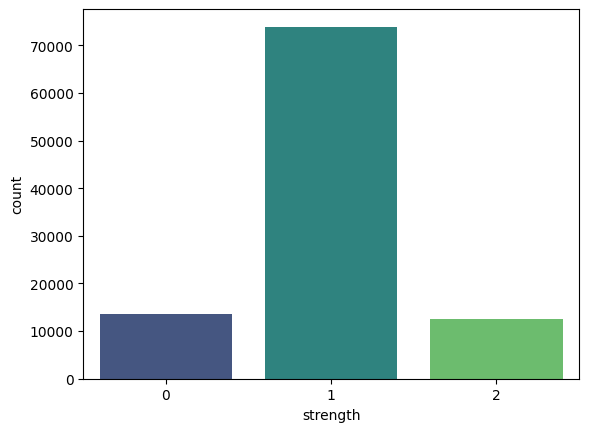

In [14]:
sns.countplot(data=df, x='strength', palette='viridis')

### Basic Data Cleaning 

In [15]:
df.columns

Index(['index', 'password', 'strength'], dtype='object')

In [16]:
# removing ir-relevant features
df.drop(['index'], axis = 1 , inplace= True)

### Removing Duplicates

In [17]:
df.duplicated().sum()

0

In [18]:
df

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [19]:
# checking missing values 
df.isna().sum()

password    0
strength    0
dtype: int64

In [20]:
# if any feature have NAN values
df.isnull().any().sum()

0

In [21]:
# checking datatypes of every feature
df.dtypes

password    object
strength     int64
dtype: object

In [22]:
# checking wether 'strenth' feature has ir-relavant values or not 
df['strength'] , df['strength'].unique()

(0        1
 1        1
 2        1
 3        2
 4        1
         ..
 99995    1
 99996    1
 99997    1
 99998    1
 99999    1
 Name: strength, Length: 100000, dtype: int64,
 array([1, 2, 0]))

In [23]:
password_tuple = np.array(df)

In [24]:
password_tuple

array([['zxe870819', 1],
       ['xw46454nr23l', 1],
       ['soporte13', 1],
       ...,
       ['czvrbun38', 1],
       ['mymyxe430', 1],
       ['glqjhkxb467', 1]], dtype=object)

In [25]:
random.shuffle(password_tuple)

In [26]:
password_tuple

array([['zxe870819', 1],
       ['zxe870819', 1],
       ['xw46454nr23l', 1],
       ...,
       ['19levski14', 1],
       ['640aWOZYrovoPE', 2],
       ['pumwlsrak0', 1]], dtype=object)

In [27]:
x = [labels[0] for labels in password_tuple] #  feature (password_char)
y = [labels[1] for labels in password_tuple]    # Target (0 ,1 , 2)

In [28]:
# here we need to make function to divide the word to characters
def word_divide_char(inputs):
    character = []
    for i in inputs:
        character.append(i)
    return character

In [29]:
# test our function in any word 'xw46454nr23l'
word_divide_char('xw46454nr23l')

['x', 'w', '4', '6', '4', '5', '4', 'n', 'r', '2', '3', 'l']

- So it's work very well 

**Now we can apply TF-IDF on the Word**

In [30]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [31]:
X = vectorizer.fit_transform(x)

In [32]:
X.shape

(100000, 85)

In [33]:
vectorizer.get_feature_names_out()

array(['\x06', '\x17', ' ', '!', '#', '$', '%', '&', '(', ')', '*', '+',
       '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ';', '<', '=', '>', '?', '@', '[', ']', '^', '_', '`', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|',
       '}', '~', '¡', '°', '±', '³', '´', '·', 'ß', 'ä', 'ç', 'é', 'ñ',
       'ó', 'õ', 'ö', '÷', 'ú', 'ý', 'þ', '›'], dtype=object)

In [34]:
first_document_vector = X[0]
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.27247602],
        [0.20801614],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.31381458],
        [0.60983296],
        [0.2894619 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.23485457],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [35]:
tf_df = pd.DataFrame(first_document_vector.T.todense(), index=vectorizer.get_feature_names_out(), columns= ['TF-IDF'])

In [36]:
tf_df.sort_values(by=['TF-IDF'] , ascending = False)

,TF-IDF
8,0.609833
x,0.380069
z,0.358766
7,0.313815
9,0.289462
...,...
@,0.000000
?,0.000000
>,0.000000
=,0.000000


- Splitting data into training and testing

In [37]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size= 0.30 , random_state= 0)

In [38]:
x_train.shape

(70000, 85)

In [53]:
clf = LogisticRegression(multi_class='multinomial')

In [54]:
clf.fit(x_train ,y_train)

LogisticRegression(multi_class='multinomial')

In [55]:
# test to real data 
dt = np.array(['al2333'])
pred = vectorizer.transform(dt)
clf.predict(pred)

array([0])

In [56]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

- Accuracy Score Testing

In [57]:
accuracy = accuracy_score(y_test , y_pred) 

In [58]:
accuracy

0.8128333333333333

In [59]:
cm = confusion_matrix(y_test , y_pred)

In [60]:
cm

array([[ 1043,  3026,     1],
       [  751, 20844,   556],
       [   27,  1254,  2498]])

In [61]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.57      0.26      0.35      4070
           1       0.83      0.94      0.88     22151
           2       0.82      0.66      0.73      3779

    accuracy                           0.81     30000
   macro avg       0.74      0.62      0.66     30000
weighted avg       0.79      0.81      0.79     30000



- Saving the model as a pickle file

In [62]:
# save our model
#pickle.dump(Reg, open('model_logisticregression_baseline.pkl', 'wb'))

- Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# Define logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'multi_class': ['ovr', 'multinomial']
}

In [68]:
# Perform gride search with 5 folds cross-valudation
grid_search = GridSearchCV(estimator = logistic_regression ,
                           param_grid= param_grid ,
                           cv = 5 , 
                           scoring = 'accuracy' , 
                           verbose= 1,
                           n_jobs = -1)

In [69]:
grid_search.fit(x_train , y_train)
# Run time about 15 min 

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/0xnrous/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='no

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [70]:
best_param = grid_search.best_params_
best_param

{'C': 0.001,
 'multi_class': 'multinomial',
 'penalty': 'none',
 'solver': 'newton-cg'}

In [72]:
# save the parameter to new variable 
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.001, max_iter=1000, multi_class='multinomial',
                   penalty='none', solver='newton-cg')

In [73]:
# Evaluate the best model
best_model.fit(x_train , y_train)
y_pred_best = best_model.predict(x_test)
accuracy_best = accuracy_score(y_test , y_pred_best)
con_matrix_best = confusion_matrix(y_test , y_pred_best)
classification_report_best = classification_report(y_test , y_pred_best)

In [74]:
print("Best Hyperparameters: ", best_param)
print("Accuracy of the Hyperparameter Model: " , accuracy_best)
print("Confusion Matrix of Hyperparameter Model: ", con_matrix_best)
print("Classification Report of Hyperparameter Model: " , classification_report_best)

Best Hyperparameters:  {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'newton-cg'}
Accuracy of the Hyperparameter Model:  0.8150333333333334
Confusion Matrix of Hyperparameter Model:  [[ 1239  2831     0]
 [  915 20598   638]
 [    7  1158  2614]]
Classification Report of Hyperparameter Model:                precision    recall  f1-score   support

           0       0.57      0.30      0.40      4070
           1       0.84      0.93      0.88     22151
           2       0.80      0.69      0.74      3779

    accuracy                           0.82     30000
   macro avg       0.74      0.64      0.67     30000
weighted avg       0.80      0.82      0.80     30000



In [ ]:
#pkl.dump(grid_search, open('model_logisticregression_Hyperparamter.pkl', 'wb'))

In [107]:
xgb =XGBClassifier()

In [108]:
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [109]:
xgb_pred = xgb.predict(x_test)

In [110]:
xgb_pred

array([1, 1, 1, ..., 1, 1, 0])

In [111]:
accuracy = accuracy_score(y_test , xgb_pred) 

In [117]:
print(f"Accuracy of the XGBOOST  Classifier Model: {accuracy*100}%")

Accuracy of the XGBOOST  Classifier Model: 98.44333333333334 %


### here we can see we make the model better by using XGBOOST with accuracy 

In [114]:
pkl.dump(xgb, open('model__XGBOOST_Classifier.pkl', 'wb'))

In [77]:
%pip install watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [78]:
%load_ext watermark

In [82]:
%watermark -v -m -p pandas,numpy,sklearn,seaborn,matplotlib,sqlite3,watermark

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.10.0

pandas    : 1.3.5
numpy     : 1.21.6
sklearn   : 1.3.2
seaborn   : 0.12.1
matplotlib: 3.8.2
sqlite3   : 2.6.0
watermark : 2.4.3

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 22.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 10
Architecture: 64bit



UsageError: Line magic function `%Sklearn` not found.
